In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [10]:
PV_dataset = pd.read_csv(r"C:\Users\USER\OneDrive - Teesside University\project\Project\Solar\Predective modelling\PV forecast\PV_dataset3.csv")

In [12]:
from sklearn.model_selection import train_test_split

In [16]:
X = PV_dataset.drop(columns = ['PV power'], axis= 1)
Y = PV_dataset['PV power']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

In [20]:
!pip install tensorflow

In [22]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [24]:
model_ANN = keras.Sequential([
    keras.layers.Flatten(input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # Linear activation for regression
])

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model_ANN.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [28]:
history = model_ANN.fit(X_train, Y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/100
343/343 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 15026.1074 - mae: 61.4058 - val_loss: 138.8901 - val_mae: 6.7895
Epoch 2/100
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 118.5473 - mae: 6.4993 - val_loss: 118.1318 - val_mae: 5.9031
Epoch 3/100
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 102.9378 - mae: 6.0024 - val_loss: 97.1546 - val_mae: 5.3333
Epoch 4/100
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 88.1162 - mae: 5.5733 - val_loss: 79.6567 - val_mae: 4.9805
Epoch 5/100
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 76.4118 - mae: 5.2602 - val_loss: 68.1767 - val_mae: 4.6406
Epoch 6/100
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 66.8734 - mae: 4.9460 - val_loss: 61.6439 - val_mae: 4.4347
Epoch 7/100
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 62.0259 - mae: 4.7908 - val_loss: 56.2936 - val_mae: 4.1989
Epoch 8/100
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 56.3027 - mae: 4.5790 - val_loss: 54.2606 - val_mae: 4.2167
Epoch 9/100
343/343 ━━━━

In [30]:
loss, accuracy = model_ANN.evaluate(X_test, Y_test)
print(f'The accuracy of the model is {accuracy} and loss is {loss}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.0146 - mae: 4.4666
The accuracy of the model is 4.4795403480529785 and loss is 30.65617561340332


In [32]:
test_prediction = model_ANN.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [42]:
# libraries for model accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

In [91]:
test_data_r2 = r2_score(test_prediction, Y_test)
test_data_MAE = mean_absolute_error(test_prediction, Y_test)
test_data_MSE = mean_squared_error(test_prediction, Y_test)
test_data_MAPE = mean_absolute_percentage_error(test_prediction, Y_test)
print(f'The testing data r2 score: {test_data_r2:.3f}')
print(f'The testing data MAE score: {test_data_MAE:.3f}')
print(f'The testing data MSE score: {test_data_MSE:.3f}')
print(f'The test data MAPE score: {test_data_MAPE:.3f}')

The testing data r2 score: 0.999
The testing data MAE score: 4.480
The testing data MSE score: 30.656
The test data MAPE score: 0.157


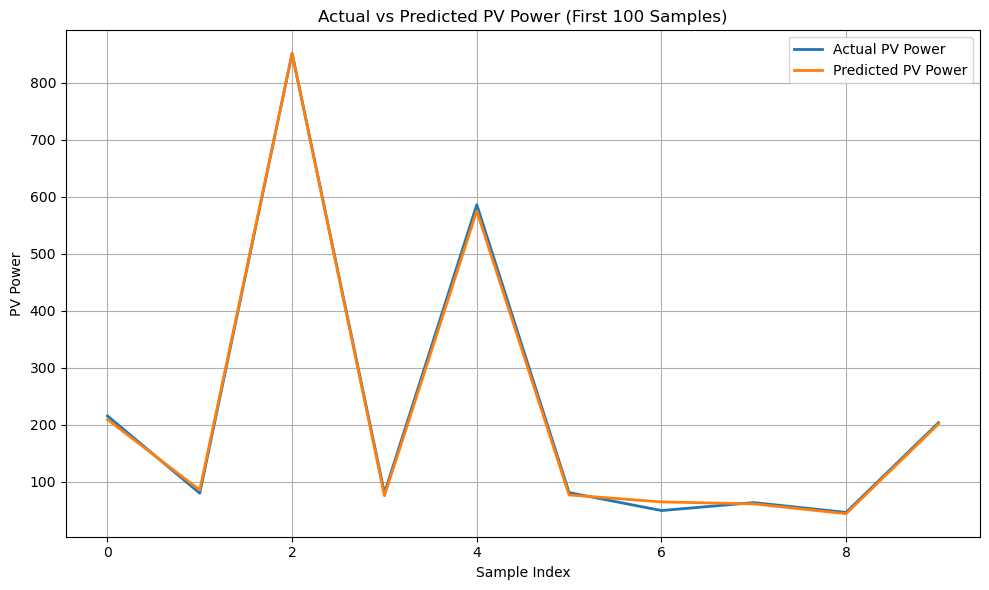

In [75]:
# Ensure you are using the first 100 rows
Y_test_100 = Y_test[:10]
test_prediction_100 = test_prediction[:10]

# If Y_test is a Series, convert to list for plotting
Y_test_list = list(Y_test_100)
test_prediction_list = list(test_prediction_100)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Y_test_list, label='Actual PV Power', linewidth=2)
plt.plot(test_prediction_list, label='Predicted PV Power', linewidth=2)
plt.xlabel('Sample Index')
plt.ylabel('PV Power')
plt.title('Actual vs Predicted PV Power (First 100 Samples)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


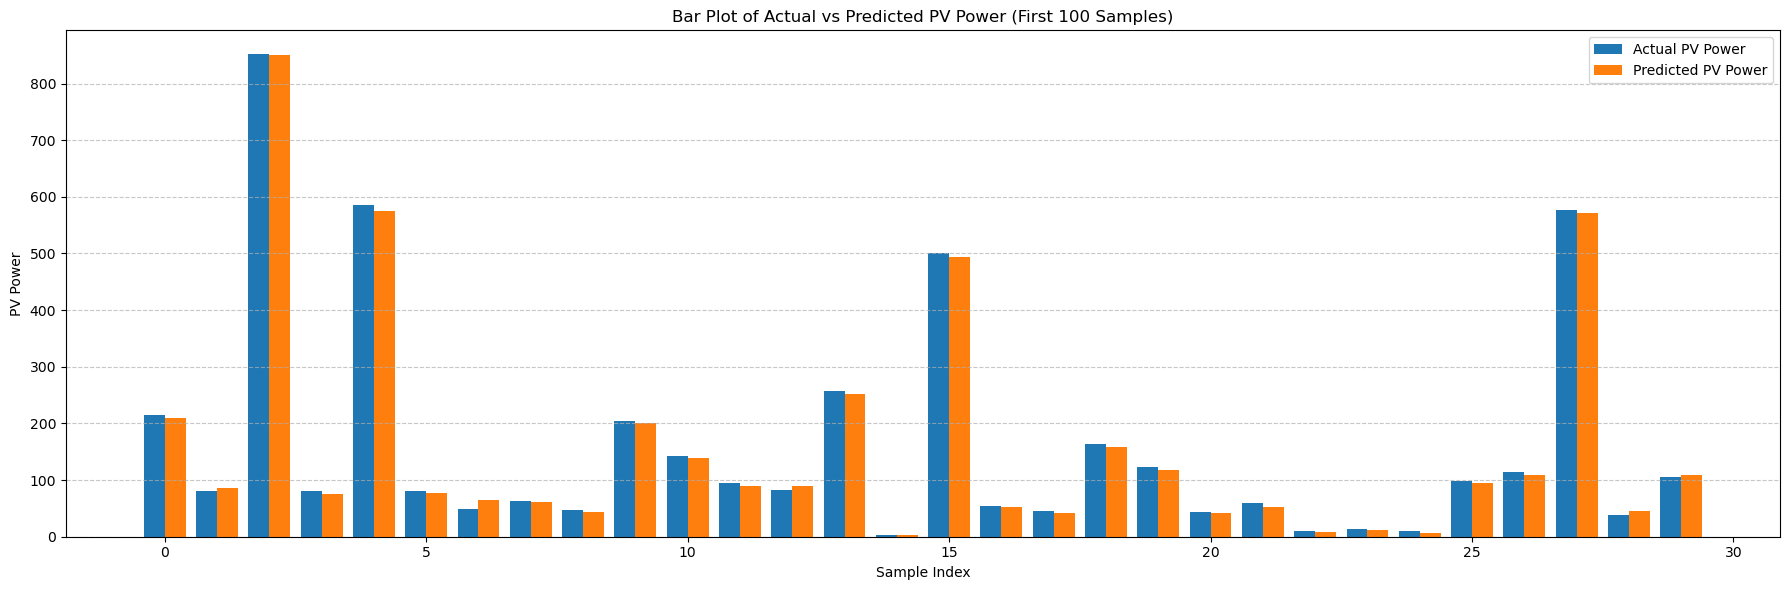

In [89]:
# Convert to flat numpy arrays (if not already)
actual = np.array(Y_test[:30]).flatten()
predicted = np.array(test_prediction[:30]).flatten()

# Sample indices for the x-axis
indices = np.arange(len(actual))
bar_width = 0.4

# Plot side-by-side bars
plt.figure(figsize=(18, 6))
plt.bar(indices - bar_width/2, actual, width=bar_width, label='Actual PV Power')
plt.bar(indices + bar_width/2, predicted, width=bar_width, label='Predicted PV Power')

# Plot formatting
plt.xlabel('Sample Index')
plt.ylabel('PV Power')
plt.title('Bar Plot of Actual vs Predicted PV Power (First 100 Samples)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()